In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd

import warnings 
warnings.simplefilter("ignore")

In [2]:
air = pd.read_csv("Train.csv")
air.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [3]:
air["Date"] = pd.to_datetime(air["Date"])

air['year'] = air["Date"].dt.year
air["month"] = air["Date"].dt.month
air["day"] = air["Date"].dt.day

dates = ['year', 'month', 'day']
air.head(3)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,year,month,day
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,...,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,2020,1,2
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,...,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,2020,1,3
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.4,33.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,4


In [4]:
corr = pd.DataFrame(air.corr().target)
print(corr)

                              target
target                      1.000000
target_min                  0.818803
target_max                  0.630801
target_variance             0.184818
target_count                0.094135
...                              ...
L3_CH4_solar_azimuth_angle -0.118004
L3_CH4_solar_zenith_angle   0.043264
year                             NaN
month                      -0.122800
day                         0.005238

[82 rows x 1 columns]


In [5]:
corr = corr.rename({'target': 'corr'}, axis = 1)
print(corr)

                                corr
target                      1.000000
target_min                  0.818803
target_max                  0.630801
target_variance             0.184818
target_count                0.094135
...                              ...
L3_CH4_solar_azimuth_angle -0.118004
L3_CH4_solar_zenith_angle   0.043264
year                             NaN
month                      -0.122800
day                         0.005238

[82 rows x 1 columns]


In [6]:
keep = corr[corr['corr'].abs()>0.2].index
more = air.iloc[:, 10:14].columns

In [7]:
more

Index(['specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground'],
      dtype='object')

In [8]:
basic = air.iloc[:, :8]

In [9]:
basic

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95
...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72


In [10]:
kept = air[keep].drop(['target', 'target_min', 'target_max'], axis = 1)

In [11]:
kept = pd.concat([air[more], kept], axis = 1)
kept = pd.concat([air[dates], kept], axis = 1)
kept

,year,month,day,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_AER_AI_sensor_altitude
0,2020,1,2,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,0.000017,0.021080,-0.000010,0.000064,840209.874619
1,2020,1,3,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,0.000021,0.022017,0.000114,0.000171,840772.941995
2,2020,1,4,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,0.000007,0.020677,0.000027,0.000124,841410.713456
3,2020,1,5,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,0.000023,0.021207,0.000023,0.000081,841103.242368
4,2020,1,6,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.000009,0.037766,0.000037,0.000140,840763.055499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,2020,3,15,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,0.000019,0.039941,-0.000003,0.000024,833637.575687
30553,2020,3,16,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,0.000033,0.037872,-0.000034,-0.000014,833894.342749
30554,2020,3,17,0.00356,4.438623,0.095703,0.141943,0.000068,0.000135,0.000025,0.038539,0.000068,0.000094,833286.230217
30555,2020,3,18,0.00523,10.573236,0.434940,-1.439778,0.000086,0.000148,0.000038,0.038757,-0.000017,0.000063,833480.959689


In [12]:
air_reduced = pd.concat([basic,kept], axis = 1)

air_reduced = air_reduced.drop("Place_ID X Date", axis = 1)

air_reduced = air_reduced.set_index(['Place_ID', "Date"])

air_reduced.columns = air_reduced.columns.str.lower().str.replace("(?<!^) (?!$)","_").str.replace(" ", "").str.replace("-","_")

air_reduced

target  target_min  target_max  target_variance  \
Place_ID Date                                                          
010Q650  2020-01-02    38.0        23.0        53.0           769.50   
         2020-01-03    39.0        25.0        63.0          1319.85   
         2020-01-04    24.0         8.0        56.0          1181.96   
         2020-01-05    49.0        10.0        55.0          1113.67   
         2020-01-06    21.0         9.0        52.0          1164.82   
...                     ...         ...         ...              ...   
YWSFY6Q  2020-03-15    22.0        14.0        83.0          3848.86   
         2020-03-16    53.0        30.0       146.0          9823.87   
         2020-03-17    85.0        52.0       153.0          8900.85   
         2020-03-18   103.0        33.0       149.0         13963.90   
         2020-03-19    89.0        46.0       132.0          9393.64   

                     target_count  year  month  day  \
Place_ID Date                                         
010Q650  2020-01-02            92  2020      1    2   
         2020-01-03            91  2020      1    3   
         2020-01-04            96  2020      1    4   
         2020-01-05            96  2020      1    5   
         2020-01-06            95  2020      1    6   
...                           ...   ...    ...  ...   
YWSFY6Q  2020-03-15            72  2020      3   15   
         2020-03-16            72  2020      3   16   
         2020-03-17            72  2020      3   17   
         2020-03-18            72  2020      3   18   
         2020-03-19            72  2020      3   19   

                     specific_humidity_2m_above_ground  \
Place_ID Date                                            
010Q650  2020-01-02                            0.00804   
         2020-01-03                            0.00839   
         2020-01-04                            0.00750   
         2020-01-05                            0.00391   
         2020-01-06                            0.00535   
...                                                ...   
YWSFY6Q  2020-03-15                            0.00352   
         2020-03-16                            0.00341   
         2020-03-17                            0.00356   
         2020-03-18                            0.00523   
         2020-03-19                            0.00486   

                     temperature_2m_above_ground  \
Place_ID Date                                      
010Q650  2020-01-02                    18.516840   
         2020-01-03                    22.546533   
         2020-01-04                    27.031030   
         2020-01-05                    23.971857   
         2020-01-06                    16.816309   
...                                          ...   
YWSFY6Q  2020-03-15                     4.256799   
         2020-03-16                     2.067438   
         2020-03-17                     4.438623   
         2020-03-18                    10.573236   
         2020-03-19                     9.002069   

                     u_component_of_wind_10m_above_ground  \
Place_ID Date                                               
010Q650  2020-01-02                              1.996377   
         2020-01-03                              3.330430   
         2020-01-04                              5.065727   
         2020-01-05                              3.004001   
         2020-01-06                              2.621787   
...                                                   ...   
YWSFY6Q  2020-03-15                             -4.810586   
         2020-03-16                             -2.346421   
         2020-03-17                              0.095703   
         2020-03-18                              0.434940   
         2020-03-19                             -0.710093   

                     v_component_of_wind_10m_above_ground  \
Place_ID Date                                               
010Q650  2020-01-02 

In [13]:
air_reduced.columns = air_reduced.columns.str.strip("l3_").str.replace("column_number_density", "cnd")

In [14]:
air_reduced

target  target_min  target_max  target_variance  \
Place_ID Date                                                          
010Q650  2020-01-02    38.0        23.0        53.0           769.50   
         2020-01-03    39.0        25.0        63.0          1319.85   
         2020-01-04    24.0         8.0        56.0          1181.96   
         2020-01-05    49.0        10.0        55.0          1113.67   
         2020-01-06    21.0         9.0        52.0          1164.82   
...                     ...         ...         ...              ...   
YWSFY6Q  2020-03-15    22.0        14.0        83.0          3848.86   
         2020-03-16    53.0        30.0       146.0          9823.87   
         2020-03-17    85.0        52.0       153.0          8900.85   
         2020-03-18   103.0        33.0       149.0         13963.90   
         2020-03-19    89.0        46.0       132.0          9393.64   

                     target_count  year  month  day  \
Place_ID Date                                         
010Q650  2020-01-02            92  2020      1    2   
         2020-01-03            91  2020      1    3   
         2020-01-04            96  2020      1    4   
         2020-01-05            96  2020      1    5   
         2020-01-06            95  2020      1    6   
...                           ...   ...    ...  ...   
YWSFY6Q  2020-03-15            72  2020      3   15   
         2020-03-16            72  2020      3   16   
         2020-03-17            72  2020      3   17   
         2020-03-18            72  2020      3   18   
         2020-03-19            72  2020      3   19   

                     specific_humidity_2m_above_ground  \
Place_ID Date                                            
010Q650  2020-01-02                            0.00804   
         2020-01-03                            0.00839   
         2020-01-04                            0.00750   
         2020-01-05                            0.00391   
         2020-01-06                            0.00535   
...                                                ...   
YWSFY6Q  2020-03-15                            0.00352   
         2020-03-16                            0.00341   
         2020-03-17                            0.00356   
         2020-03-18                            0.00523   
         2020-03-19                            0.00486   

                     temperature_2m_above_ground  \
Place_ID Date                                      
010Q650  2020-01-02                    18.516840   
         2020-01-03                    22.546533   
         2020-01-04                    27.031030   
         2020-01-05                    23.971857   
         2020-01-06                    16.816309   
...                                          ...   
YWSFY6Q  2020-03-15                     4.256799   
         2020-03-16                     2.067438   
         2020-03-17                     4.438623   
         2020-03-18                    10.573236   
         2020-03-19                     9.002069   

                     u_component_of_wind_10m_above_ground  \
Place_ID Date                                               
010Q650  2020-01-02                              1.996377   
         2020-01-03                              3.330430   
         2020-01-04                              5.065727   
         2020-01-05                              3.004001   
         2020-01-06                              2.621787   
...                                                   ...   
YWSFY6Q  2020-03-15                             -4.810586   
         2020-03-16                             -2.346421   
         2020-03-17                              0.095703   
         2020-03-18                              0.434940   
         2020-03-19                             -0.710093   

                     v_component_of_wind_10m_above_ground  no2_no2_cnd  \
Place_ID Date                                                       

In [15]:
air_reduced.columns = air_reduced.columns.str.replace("^no2_","").str.replace("^co_","").str.replace("^hcho_","")

In [16]:

air_reduced

target  target_min  target_max  target_variance  \
Place_ID Date                                                          
010Q650  2020-01-02    38.0        23.0        53.0           769.50   
         2020-01-03    39.0        25.0        63.0          1319.85   
         2020-01-04    24.0         8.0        56.0          1181.96   
         2020-01-05    49.0        10.0        55.0          1113.67   
         2020-01-06    21.0         9.0        52.0          1164.82   
...                     ...         ...         ...              ...   
YWSFY6Q  2020-03-15    22.0        14.0        83.0          3848.86   
         2020-03-16    53.0        30.0       146.0          9823.87   
         2020-03-17    85.0        52.0       153.0          8900.85   
         2020-03-18   103.0        33.0       149.0         13963.90   
         2020-03-19    89.0        46.0       132.0          9393.64   

                     target_count  year  month  day  \
Place_ID Date                                         
010Q650  2020-01-02            92  2020      1    2   
         2020-01-03            91  2020      1    3   
         2020-01-04            96  2020      1    4   
         2020-01-05            96  2020      1    5   
         2020-01-06            95  2020      1    6   
...                           ...   ...    ...  ...   
YWSFY6Q  2020-03-15            72  2020      3   15   
         2020-03-16            72  2020      3   16   
         2020-03-17            72  2020      3   17   
         2020-03-18            72  2020      3   18   
         2020-03-19            72  2020      3   19   

                     specific_humidity_2m_above_ground  \
Place_ID Date                                            
010Q650  2020-01-02                            0.00804   
         2020-01-03                            0.00839   
         2020-01-04                            0.00750   
         2020-01-05                            0.00391   
         2020-01-06                            0.00535   
...                                                ...   
YWSFY6Q  2020-03-15                            0.00352   
         2020-03-16                            0.00341   
         2020-03-17                            0.00356   
         2020-03-18                            0.00523   
         2020-03-19                            0.00486   

                     temperature_2m_above_ground  \
Place_ID Date                                      
010Q650  2020-01-02                    18.516840   
         2020-01-03                    22.546533   
         2020-01-04                    27.031030   
         2020-01-05                    23.971857   
         2020-01-06                    16.816309   
...                                          ...   
YWSFY6Q  2020-03-15                     4.256799   
         2020-03-16                     2.067438   
         2020-03-17                     4.438623   
         2020-03-18                    10.573236   
         2020-03-19                     9.002069   

                     u_component_of_wind_10m_above_ground  \
Place_ID Date                                               
010Q650  2020-01-02                              1.996377   
         2020-01-03                              3.330430   
         2020-01-04                              5.065727   
         2020-01-05                              3.004001   
         2020-01-06                              2.621787   
...                                                   ...   
YWSFY6Q  2020-03-15                             -4.810586   
         2020-03-16                             -2.346421   
         2020-03-17                              0.095703   
         2020-03-18                              0.434940   
         2020-03-19                             -0.710093   

                     v_component_of_wind_10m_above_ground   no2_cnd  \
Place_ID Date                                                         


In [17]:
for column in air_reduced:
    air_reduced[column] = air_reduced[column].fillna(air_reduced[column].mean())

In [18]:
air_reduced.isnull().describe()

,target,target_min,target_max,target_variance,target_count,year,month,day,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,no2_cnd,no2_slant_cnd,tropospheric_no2_cnd,co_cnd,hcho_slant_cnd,tropospheric_hcho_cnd,aer_ai_sensor_altitude
count,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557,30557


In [19]:
air_reduced.dtypes

target                                  float64
target_min                              float64
target_max                              float64
target_variance                         float64
target_count                              int64
year                                      int64
month                                     int64
day                                       int64
specific_humidity_2m_above_ground       float64
temperature_2m_above_ground             float64
u_component_of_wind_10m_above_ground    float64
v_component_of_wind_10m_above_ground    float64
no2_cnd                                 float64
no2_slant_cnd                           float64
tropospheric_no2_cnd                    float64
co_cnd                                  float64
hcho_slant_cnd                          float64
tropospheric_hcho_cnd                   float64
aer_ai_sensor_altitude                  float64
dtype: object

In [20]:
from scipy import stats

In [21]:
def find_outliers(df): 
    for column in df: 
        if df[column].dtype != np.object:
            abs_z = np.abs(stats.zscore(df[column]))
            outlier = abs_z>3
            n_outliers = len(df[outlier])
            print("{} | {}| {}".format(df[column].name, n_outliers, df[column].dtype))

In [22]:
find_outliers(air_reduced)

target | 255| float64
target_min | 702| float64
target_max | 584| float64
target_variance | 130| float64
target_count | 619| int64
year | 0| int64
month | 0| int64
day | 0| int64
specific_humidity_2m_above_ground | 346| float64
temperature_2m_above_ground | 143| float64
u_component_of_wind_10m_above_ground | 398| float64
v_component_of_wind_10m_above_ground | 320| float64
no2_cnd | 380| float64
no2_slant_cnd | 422| float64
tropospheric_no2_cnd | 449| float64
co_cnd | 783| float64
hcho_slant_cnd | 538| float64
tropospheric_hcho_cnd | 490| float64
aer_ai_sensor_altitude | 499| float64


In [23]:
air_reduced.target.max()

815.0

In [24]:
air_reduced = air_reduced[air_reduced["target"] < 400]


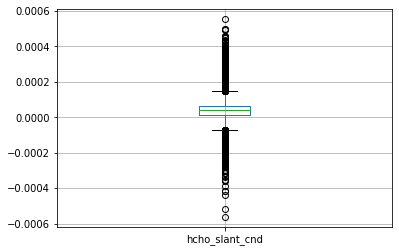

In [25]:
air_reduced.boxplot("hcho_slant_cnd")

In [26]:
air_reduced = air_reduced[air_reduced.co_cnd < .15]

In [27]:
air_reduced.duplicated().unique()

array([False])

## Variable Distribution

In [28]:
from ipywidgets import interact, fixed

In [29]:
def plot_dist(df, col): 
    df[col].plot.kde()

In [30]:
num_columns = air_reduced.select_dtypes(include = np.number).columns

In [31]:
#interact(plot_dist, col = num_columns, df = fixed(air_reduced))

In [32]:
def plot_normality(df, col): 
    stats.probplot(df[col], plot = sns.mpl.pyplot)

In [33]:
interact(plot_normality, col = num_columns, df = fixed(air_reduced))

interactive(children=(Dropdown(description='col', options=('target', 'target_min', 'target_max', 'target_varia…

<function __main__.plot_normality(df, col)>

In [34]:
for col in num_columns: 
    _, pval = stats.normaltest(air_reduced[col][air_reduced[col].notnull()])
    if(pval < 0.01): 
        print(f"{col} doesn't follow a normal distribution\n")

target doesn't follow a normal distribution

target_min doesn't follow a normal distribution

target_max doesn't follow a normal distribution

target_variance doesn't follow a normal distribution

target_count doesn't follow a normal distribution

year doesn't follow a normal distribution

month doesn't follow a normal distribution

day doesn't follow a normal distribution

specific_humidity_2m_above_ground doesn't follow a normal distribution

temperature_2m_above_ground doesn't follow a normal distribution

u_component_of_wind_10m_above_ground doesn't follow a normal distribution

v_component_of_wind_10m_above_ground doesn't follow a normal distribution

no2_cnd doesn't follow a normal distribution

no2_slant_cnd doesn't follow a normal distribution

tropospheric_no2_cnd doesn't follow a normal distribution

co_cnd doesn't follow a normal distribution

hcho_slant_cnd doesn't follow a normal distribution

tropospheric_hcho_cnd doesn't follow a normal distribution

aer_ai_sensor_altitu

In [35]:
air_clean = air_reduced.drop(['target_min','target_max','target_variance','target_count'], axis = 1)

In [36]:
air_clean

target  year  month  day  \
Place_ID Date                                   
010Q650  2020-01-02    38.0  2020      1    2   
         2020-01-03    39.0  2020      1    3   
         2020-01-04    24.0  2020      1    4   
         2020-01-05    49.0  2020      1    5   
         2020-01-06    21.0  2020      1    6   
...                     ...   ...    ...  ...   
YWSFY6Q  2020-03-15    22.0  2020      3   15   
         2020-03-16    53.0  2020      3   16   
         2020-03-17    85.0  2020      3   17   
         2020-03-18   103.0  2020      3   18   
         2020-03-19    89.0  2020      3   19   

                     specific_humidity_2m_above_ground  \
Place_ID Date                                            
010Q650  2020-01-02                            0.00804   
         2020-01-03                            0.00839   
         2020-01-04                            0.00750   
         2020-01-05                            0.00391   
         2020-01-06                            0.00535   
...                                                ...   
YWSFY6Q  2020-03-15                            0.00352   
         2020-03-16                            0.00341   
         2020-03-17                            0.00356   
         2020-03-18                            0.00523   
         2020-03-19                            0.00486   

                     temperature_2m_above_ground  \
Place_ID Date                                      
010Q650  2020-01-02                    18.516840   
         2020-01-03                    22.546533   
         2020-01-04                    27.031030   
         2020-01-05                    23.971857   
         2020-01-06                    16.816309   
...                                          ...   
YWSFY6Q  2020-03-15                     4.256799   
         2020-03-16                     2.067438   
         2020-03-17                     4.438623   
         2020-03-18                    10.573236   
         2020-03-19                     9.002069   

                     u_component_of_wind_10m_above_ground  \
Place_ID Date                                               
010Q650  2020-01-02                              1.996377   
         2020-01-03                              3.330430   
         2020-01-04                              5.065727   
         2020-01-05                              3.004001   
         2020-01-06                              2.621787   
...                                                   ...   
YWSFY6Q  2020-03-15                             -4.810586   
         2020-03-16                             -2.346421   
         2020-03-17                              0.095703   
         2020-03-18                              0.434940   
         2020-03-19                             -0.710093   

                     v_component_of_wind_10m_above_ground   no2_cnd  \
Place_ID Date                                                         
010Q650  2020-01-02                             -1.227395  0.000074   
         2020-01-03                             -1.188108  0.000076   
         2020-01-04                              3.500559  0.000067   
         2020-01-05                              1.099468  0.000083   
         2020-01-06                              2.670559  0.000070   
...                                                   ...       ...   
YWSFY6Q  2020-03-15                             -4.195359  0.000063   
         2020-03-16                              0.749136  0.000072   
         2020-03-17                              0.141943  0.000068   
         2020-03-18                             -1.439778  0.000086   
         2020-03-19                              0.887913  0.000079   

                     no2_slant_cnd  tropospheric_no2_cnd    co_cnd  \
Place_ID Date                                                        
010Q650  2020-01-02       0.000156              0.000017  0.021080   
         2020-01-03    

In [37]:
#air_clean.groupby('Place_ID').target.mean().sort_values().plot.barh()

In [38]:
def barh_shape(col):
    air_clean.groupby('Place_ID')[col].mean().sort_values().plot.barh()

In [39]:
columns = air_clean.columns

In [40]:
#interact(barh_shape, col = columns)

In [41]:
#sns.pairplot(air_clean)

In [42]:
newcorr = air_clean.corr()

In [43]:
newcorr.values > 0.7

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False],
       [False, False, Fa

In [44]:
newcorr

,target,year,month,day,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,no2_cnd,no2_slant_cnd,tropospheric_no2_cnd,co_cnd,hcho_slant_cnd,tropospheric_hcho_cnd,aer_ai_sensor_altitude
target,1.000000,NaN,-0.123800,0.007398,-0.035858,-0.043440,-0.152535,-0.057910,0.303374,0.311307,0.259745,0.342203,0.292512,0.316003,-0.314938
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.123800,NaN,1.000000,-0.152698,0.080988,0.156154,-0.051165,-0.023340,-0.191227,-0.281440,-0.186110,-0.036260,-0.002642,-0.003318,0.007429
day,0.007398,NaN,-0.152698,1.000000,0.001737,0.014533,-0.048490,-0.038773,-0.017384,-0.020139,-0.017948,0.081785,0.016467,0.029576,-0.001879
specific_humidity_2m_above_ground,-0.035858,NaN,0.080988,0.001737,1.000000,0.816467,-0.192043,0.023102,-0.177707,-0.242808,-0.170672,0.001757,0.308732,0.323805,-0.188628
temperature_2m_above_ground,-0.043440,NaN,0.156154,0.014533,0.816467,1.000000,-0.143753,-0.010567,-0.149719,-0.233441,-0.125026,-0.013138,0.303238,0.381660,-0.170618
u_component_of_wind_10m_above_ground,-0.152535,NaN,-0.051165,-0.048490,-0.192043,-0.143753,1.000000,0.145396,-0.041911,0.001345,-0.027705,-0.054756,-0.111656,-0.125563,0.166534
v_component_of_wind_10m_above_ground,-0.057910,NaN,-0.023340,-0.038773,0.023102,-0.010567,0.145396,1.000000,-0.026050,-0.027867,-0.042892,-0.081734,0.001449,-0.019180,0.206435
no2_cnd,0.303374,NaN,-0.191227,-0.017384,-0.177707,-0.149719,-0.041911,-0.026050,1.000000,0.809834,0.780864,0.211063,0.094694,0.117025,-0.077362
no2_slant_cnd,0.311307,NaN,-0.281440,-0.020139,-0.242808,-0.233441,0.001345,-0.027867,0.809834,1.000000,0.811925,0.223025,0.095982,0.087785,-0.021926


In [45]:
air_clean = air_clean.drop(['specific_humidity_2m_above_ground', 'temperature_2m_above_ground','v_component_of_wind_10m_above_ground','tropospheric_no2_cnd', 'hcho_slant_cnd'], axis = 1)


In [46]:
air_clean

target  year  month  day  \
Place_ID Date                                   
010Q650  2020-01-02    38.0  2020      1    2   
         2020-01-03    39.0  2020      1    3   
         2020-01-04    24.0  2020      1    4   
         2020-01-05    49.0  2020      1    5   
         2020-01-06    21.0  2020      1    6   
...                     ...   ...    ...  ...   
YWSFY6Q  2020-03-15    22.0  2020      3   15   
         2020-03-16    53.0  2020      3   16   
         2020-03-17    85.0  2020      3   17   
         2020-03-18   103.0  2020      3   18   
         2020-03-19    89.0  2020      3   19   

                     u_component_of_wind_10m_above_ground   no2_cnd  \
Place_ID Date                                                         
010Q650  2020-01-02                              1.996377  0.000074   
         2020-01-03                              3.330430  0.000076   
         2020-01-04                              5.065727  0.000067   
         2020-01-05                              3.004001  0.000083   
         2020-01-06                              2.621787  0.000070   
...                                                   ...       ...   
YWSFY6Q  2020-03-15                             -4.810586  0.000063   
         2020-03-16                             -2.346421  0.000072   
         2020-03-17                              0.095703  0.000068   
         2020-03-18                              0.434940  0.000086   
         2020-03-19                             -0.710093  0.000079   

                     no2_slant_cnd    co_cnd  tropospheric_hcho_cnd  \
Place_ID Date                                                         
010Q650  2020-01-02       0.000156  0.021080               0.000064   
         2020-01-03       0.000197  0.022017               0.000171   
         2020-01-04       0.000170  0.020677               0.000124   
         2020-01-05       0.000175  0.021207               0.000081   
         2020-01-06       0.000142  0.037766               0.000140   
...                            ...       ...                    ...   
YWSFY6Q  2020-03-15       0.000165  0.039941               0.000024   
         2020-03-16       0.000161  0.037872              -0.000014   
         2020-03-17       0.000135  0.038539               0.000094   
         2020-03-18       0.000148  0.038757               0.000063   
         2020-03-19       0.000188  0.036230               0.000088   

                     aer_ai_sensor_altitude  
Place_ID Date                                
010Q650  2020-01-02           840209.874619  
         2020-01-03           840772.941995  
         2020-01-04           841410.713456  
         2020-01-05           841103.242368  
         2020-01-06           840763.055499  
...                                     ...  
YWSFY6Q  2020-03-15           833637.575687  
         2020-03-16           833894.342749  
         2020-03-17           833286.230217  
         2020-03-18           833480.959689  
         2020-03-19           832553.776969  

[30548 rows x 10 columns]

In [47]:
from sklearn.linear_model import LinearRegression as lm 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS

In [48]:
ivs = air_clean.drop('target', axis =1).columns
target = 'target'
X = air_clean[ivs]
y = air_clean[target]

lm = lm()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)


In [52]:
train = X_train.reset_index().copy()
train['target'] = y_train.tolist()
train['prediction'] = predictions_train

In [53]:
train.head()

,Place_ID,Date,year,month,day,u_component_of_wind_10m_above_ground,no2_cnd,no2_slant_cnd,co_cnd,tropospheric_hcho_cnd,aer_ai_sensor_altitude,target,prediction
0,4EVR9T8,2020-03-28,2020,3,28,-1.492056,0.000000,0.000000,0.061553,0.000088,831514.395331,13.0,65.163096
1,J4UZBX3,2020-02-11,2020,2,11,-2.276379,0.000095,0.000208,0.042608,0.000214,830173.741336,153.0,95.197402
2,6HXPCBH,2020-03-12,2020,3,12,0.535712,0.000366,0.000333,0.036230,0.000093,830226.832309,104.0,89.475290
3,5SXR1G0,2020-01-08,2020,1,8,-0.158350,0.000132,0.000193,0.033697,0.000041,830489.610668,25.0,69.179065
4,5ETAG9S,2020-02-09,2020,2,9,-0.131291,0.000065,0.000159,0.054385,0.000144,830374.308136,82.0,87.525439


In [54]:
train.corr().target

year                                         NaN
month                                  -0.124024
day                                     0.009075
u_component_of_wind_10m_above_ground   -0.155440
no2_cnd                                 0.305606
no2_slant_cnd                           0.308899
co_cnd                                  0.335061
tropospheric_hcho_cnd                   0.312348
aer_ai_sensor_altitude                 -0.313667
target                                  1.000000
prediction                              0.525122
Name: target, dtype: float64

In [55]:
test = X_test.reset_index().copy()
test['target'] = y_test.tolist()
test['prediction'] = predictions_test

In [56]:
test.head(10)

,Place_ID,Date,year,month,day,u_component_of_wind_10m_above_ground,no2_cnd,no2_slant_cnd,co_cnd,tropospheric_hcho_cnd,aer_ai_sensor_altitude,target,prediction
0,WNYYRYS,2020-02-09,2020,2,9,-0.421292,0.000053,0.000117,0.056283,0.000013,829840.426032,63.0,72.580108
1,TEANSOU,2020-03-03,2020,3,3,4.306462,0.000051,0.000107,0.029318,0.000088,832590.765732,9.0,42.566757
2,PHOW9EM,2020-01-21,2020,1,21,1.498406,0.000073,0.000186,0.036230,0.000088,836371.376649,29.0,51.181631
3,PCEC7FM,2020-02-04,2020,2,4,2.343888,0.000134,0.000210,0.036820,0.000011,831040.965627,50.0,61.156639
4,DALZSBE,2020-02-12,2020,2,12,3.446976,0.000094,0.000163,0.036230,0.000088,832211.549700,44.0,58.180584
5,6CR3BYP,2020-03-06,2020,3,6,0.474792,0.000214,0.000370,0.052715,0.000162,831926.137422,161.0,101.209259
6,HR0OKCA,2020-02-04,2020,2,4,5.967423,0.000041,0.000127,0.035311,-0.000069,834469.624406,38.0,25.108913
7,3WZQJU8,2020-01-18,2020,1,18,-6.085798,0.000073,0.000176,0.025657,0.000075,840653.367461,25.0,39.665825
8,VQ64B9Z,2020-02-07,2020,2,7,1.515095,0.000150,0.000213,0.036230,0.000199,831174.735225,61.0,83.208252
9,QJXIO6H,2020-02-19,2020,2,19,0.301692,0.000104,0.000185,0.046089,0.000321,828982.714344,127.0,107.467125


In [57]:
test.corr().target

year                                         NaN
month                                  -0.122930
day                                     0.000905
u_component_of_wind_10m_above_ground   -0.141097
no2_cnd                                 0.294509
no2_slant_cnd                           0.321059
co_cnd                                  0.369723
tropospheric_hcho_cnd                   0.330681
aer_ai_sensor_altitude                 -0.320270
target                                  1.000000
prediction                              0.540652
Name: target, dtype: float64

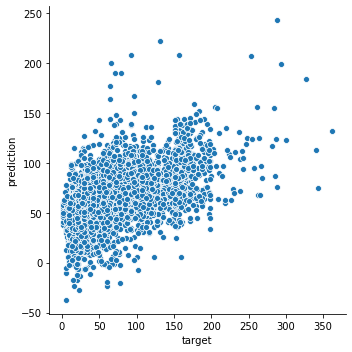

In [58]:
sns.relplot(x = "target", y = "prediction", data = test, kind = "scatter")

In [61]:
rsq = metrics.r2_score(y_test, predictions_test)
print(f"the R-squared score is {rsq}")

the R-squared score is 0.29176600584713597


In [62]:
adjusted_r2_model = 1 - (1-rsq)*(len(X_test)-1)/ (len(X_test)-len(lm.coef_) -1)
adjusted_r2_model

0.29072107044592677

In [64]:
mse = metrics.mean_squared_error(y_test, predictions_test)
print(f"the MSE is {mse}")

the MSE is 1514.8796660168966


In [65]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions_test))
print(f"the RMSE is {rmse}")

the RMSE is 38.92145508606913


In [66]:
y_test.mean()

61.23122749590836

In [67]:
mae = metrics.mean_absolute_error(y_test, predictions_test)
print(f"the Mean Absolute Error is {mae}")

the Mean Absolute Error is 29.373274986246745


In [68]:
results = {}

In [69]:
def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X=X,
                    y=y,
                    scoring="neg_mean_squared_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [70]:
from sklearn.linear_model import LinearRegression as lm

In [71]:
linreg = lm()
dtree   = DecisionTreeRegressor()
elastic = ElasticNet()
lasso   = Lasso()
ridge   = Ridge()

In [72]:
results["linear reg"] = evaluate_model(linreg)
results["tree"] = evaluate_model(dtree)
results["elasticnet"] = evaluate_model(elastic)
results["lasso"] = evaluate_model(lasso)
results["ridge"] = evaluate_model(ridge)

pd.DataFrame.from_dict(results).T

,fit_time,score_time,test_score,train_score
linear reg,0.016279,0.007980,1568.508008,1495.651115
tree,0.212905,0.003948,2291.327948,0.182623
elasticnet,0.009792,0.003023,1862.966780,1828.998713
lasso,0.010107,0.002302,1857.236721,1823.253556
ridge,0.009327,0.002398,1744.293379,1712.716098


params = {"fit_intercept": [True, False], 
         "normalize": [True, False],
         "copy_X": [True, False]}

In [73]:
search_parameters_space = {
    "alpha": [0.01, 0.1, 1, 10],  
    "fit_intercept": [True, False], # fit intercept T or F
}

In [74]:
grid = GridSearchCV(estimator=ridge, 
                    param_grid=search_parameters_space,
                    scoring="r2",
                    n_jobs=-1)

In [75]:
%%time
grid.fit(X_train, y_train)

CPU times: user 124 ms, sys: 37.6 ms, total: 161 ms
Wall time: 377 ms


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [76]:
print(grid.best_score_) # this is the R^2 of the best version of the ridge regression optimised using grid search


0.1870329478734794


In [77]:
grid.best_params_

{'alpha': 0.01, 'fit_intercept': False}

In [78]:
grid.best_estimator_ # this gets the best model all packaged for us.



Ridge(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.011443,0.005505,0.002465,0.000429,0.01,False,"{'alpha': 0.01, 'fit_intercept': False}",0.180181,0.188339,0.192088,0.202600,0.171957,0.187033,0.010429,1
0,0.016068,0.004367,0.009923,0.008701,0.01,True,"{'alpha': 0.01, 'fit_intercept': True}",0.180181,0.188339,0.192088,0.202600,0.171957,0.187033,0.010429,2
3,0.008268,0.002770,0.002662,0.000851,0.1,False,"{'alpha': 0.1, 'fit_intercept': False}",0.176335,0.185046,0.188227,0.197862,0.168235,0.183141,0.010146,3
2,0.008206,0.001210,0.002563,0.000509,0.1,True,"{'alpha': 0.1, 'fit_intercept': True}",0.176335,0.185046,0.188227,0.197862,0.168235,0.183141,0.010146,4
5,0.008034,0.001554,0.003486,0.001265,1,False,"{'alpha': 1, 'fit_intercept': False}",0.170651,0.177630,0.178574,0.185804,0.160275,0.174587,0.008617,5
4,0.008409,0.001134,0.003163,0.000506,1,True,"{'alpha': 1, 'fit_intercept': True}",0.170651,0.177630,0.178574,0.185804,0.160275,0.174587,0.008617,6
7,0.005879,0.001234,0.001932,0.000223,10,False,"{'alpha': 10, 'fit_intercept': False}",0.140409,0.143541,0.142755,0.147548,0.127483,0.140347,0.006831,7
6,0.006565,0.001508,0.002052,0.000235,10,True,"{'alpha': 10, 'fit_intercept': True}",0.140409,0.143541,0.142755,0.147548,0.127483,0.140347,0.006831,8


In [80]:
best = Ridge(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
best.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
ridge_predictions = best.predict(X_test)

In [83]:
test['ridge_prediction'] = ridge_predictions

In [84]:
test.head(30)

,Place_ID,Date,year,month,day,u_component_of_wind_10m_above_ground,no2_cnd,no2_slant_cnd,co_cnd,tropospheric_hcho_cnd,aer_ai_sensor_altitude,target,prediction,ridge_prediction
0,WNYYRYS,2020-02-09,2020,2,9,-0.421292,0.000053,0.000117,0.056283,0.000013,829840.426032,63.0,72.580108,96.463774
1,TEANSOU,2020-03-03,2020,3,3,4.306462,0.000051,0.000107,0.029318,0.000088,832590.765732,9.0,42.566757,41.542645
2,PHOW9EM,2020-01-21,2020,1,21,1.498406,0.000073,0.000186,0.036230,0.000088,836371.376649,29.0,51.181631,52.450207
3,PCEC7FM,2020-02-04,2020,2,4,2.343888,0.000134,0.000210,0.036820,0.000011,831040.965627,50.0,61.156639,65.552035
4,DALZSBE,2020-02-12,2020,2,12,3.446976,0.000094,0.000163,0.036230,0.000088,832211.549700,44.0,58.180584,57.418938
5,6CR3BYP,2020-03-06,2020,3,6,0.474792,0.000214,0.000370,0.052715,0.000162,831926.137422,161.0,101.209259,79.297108
6,HR0OKCA,2020-02-04,2020,2,4,5.967423,0.000041,0.000127,0.035311,-0.000069,834469.624406,38.0,25.108913,45.268617
7,3WZQJU8,2020-01-18,2020,1,18,-6.085798,0.000073,0.000176,0.025657,0.000075,840653.367461,25.0,39.665825,41.340332
8,VQ64B9Z,2020-02-07,2020,2,7,1.515095,0.000150,0.000213,0.036230,0.000199,831174.735225,61.0,83.208252,65.830028
9,QJXIO6H,2020-02-19,2020,2,19,0.301692,0.000104,0.000185,0.046089,0.000321,828982.714344,127.0,107.467125,84.673546


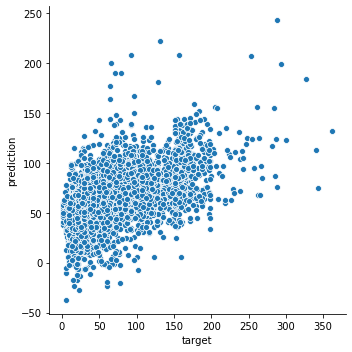

In [85]:
sns.relplot(x = "target", y = "prediction", data = test, kind = "scatter")

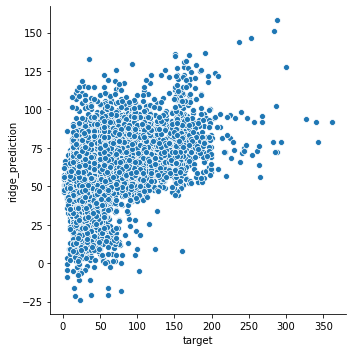

In [86]:
sns.relplot(x = "target", y = "ridge_prediction", data = test, kind = "scatter")

In [87]:
test.corr()[['target']]

,target
year,NaN
month,-0.122930
day,0.000905
u_component_of_wind_10m_above_ground,-0.141097
no2_cnd,0.294509
no2_slant_cnd,0.321059
co_cnd,0.369723
tropospheric_hcho_cnd,0.330681
aer_ai_sensor_altitude,-0.320270
target,1.000000


In [88]:
np.sqrt(evaluate_model(linreg)['test_score'])

39.604393793282966

In [89]:
air_clean.target.quantile(0.95) - air_clean.target.quantile(0.05)

145.0

In [91]:
test_set = pd.read_csv("Test.csv")

In [92]:
air_clean.to_csv("air_clean.csv")

what ive done: 
- added temp, humidity, and wind components
- month, year, and day columns
- removed some outliers - esp in target column
- didnt take out tropospheric_hcho, but instead the hcho slant